In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the daTa
df=pd.read_csv("E:/Detasates/iris (1) (4).csv")
df.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# check null values
df.isna().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [5]:
# check stat of each features
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# drop the clm
df.drop(['Unnamed: 0'],axis=1 ,inplace=True)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# Grouping the species
A=df.groupby('Species').sum()
A

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


<AxesSubplot:ylabel='count'>

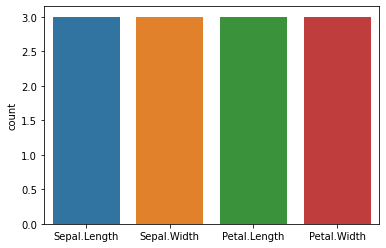

In [19]:
# check count of each species
import seaborn as sns
sns.countplot(data=A)


<AxesSubplot:>

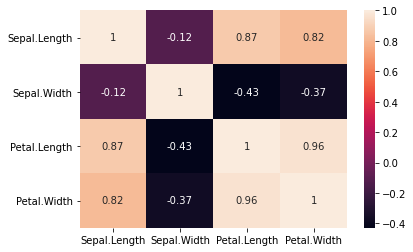

In [21]:
sns.heatmap(df.corr(),annot=True)

In [24]:
# Apply feature engineering
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [26]:
df.shape

(150, 5)

In [27]:
# split the data in x ,y
x=df.iloc[:,:4]
y=df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier().fit(xtrain,ytrain)

In [34]:
predict=model1.predict(xtest)
predict

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 2])

In [35]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(ytest,predict))
print(accuracy_score(ytest,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


In [41]:
#model with standard scaled data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(xtrain)
x_test=sc.fit_transform(xtest)

In [42]:
model_sc=KNeighborsClassifier(n_neighbors=5)
model_sc.fit(x_train,ytrain)
ypred=model_sc.predict(x_test)
ypred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1,
       2, 0, 2, 1, 1, 0, 2, 1])

In [43]:
#test
acc=accuracy_score(ytest,ypred)
acc

0.8666666666666667

In [44]:
#model Estimator
model=KNeighborsClassifier()

#parameter grid
n_neighbors=range(1,31)
metric=["euclidean","manhattan","minkowski"]
weights=['uniform','distance']
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
kfold=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

In [45]:
#Grid Search cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold,scoring="accuracy",n_jobs=1)

In [47]:
#result
res_model=grid_cv.fit(xtrain,ytrain)

In [49]:
ypred_best=res_model.predict(xtest)
ypred_best

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 2])

In [50]:
acc=accuracy_score(ytest,ypred_best)
acc

0.9666666666666667

# MODEL ANALYSIS

In [52]:
AA=pd.DataFrame({'Actual':ytest,'Model1':predict,'model_SC':ypred,'model_TU':ypred_best})
AA

,Actual,Model1,model_SC,model_TU
47,0,0,0,0
73,1,1,1,1
74,1,1,1,1
129,2,2,2,2
67,1,1,1,1
89,1,1,1,1
143,2,2,2,2
21,0,0,0,0
108,2,2,2,2
12,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

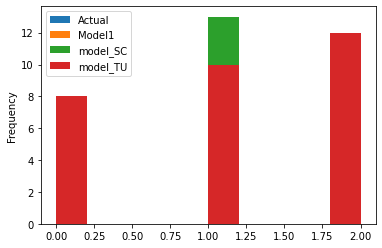

In [53]:
AA.plot(kind='hist')

In [54]:
# Accuracy
# model1= 0.96 (without scaler)
# model2= 0.86 (with scaler)
# mosel3= 0.96 (with tunning)